In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [25]:
transactions_df.columns = transactions_df.columns.str.strip().str.replace('ï»¿', '')
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
customer_transactions = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total amount spent by customer
    'Quantity': 'sum'     # Total number of products bought
}).reset_index()

In [27]:
customer_transactions.head(10)

,CustomerID,TotalValue,Quantity
0,C0001,3354.52,12
1,C0002,1862.74,10
2,C0003,2725.38,14
3,C0004,5354.88,23
4,C0005,2034.24,7
5,C0006,4227.57,12
6,C0007,2579.82,8
7,C0008,4271.61,20
8,C0009,896.50,3
9,C0010,1717.55,12


In [31]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [29]:
customer_data = customers_df.merge(customer_transactions, on="CustomerID", how="left").fillna(0)
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalValue,Quantity
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,12.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,10.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,14.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,23.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,7.0


In [35]:
#For Converting categorical data (Region) into a numerical format
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_region = encoder.fit_transform(customer_data[['Region']])

In [41]:
encoded_region

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = scaler.fit_transform(customer_data[['TotalValue', 'Quantity']])
numerical_features

array([[-0.05188436, -0.1107351 ],
       [-0.86271433, -0.43404927],
       [-0.393842  ,  0.21257907],
       [ 1.03537505,  1.66749283],
       [-0.76949861, -0.91902053],
       [ 0.42264614, -0.1107351 ],
       [-0.47295849, -0.75736344],
       [ 0.44658328,  1.18252158],
       [-1.38789656, -1.56564887],
       [-0.94162972, -0.1107351 ],
       [ 0.15220099,  0.05092198],
       [ 0.96818364,  1.02086449],
       [ 1.38632271,  0.85920741],
       [-1.70197101, -1.72730595],
       [-1.24604561, -1.40399178],
       [ 0.23069786, -0.43404927],
       [ 0.70867979,  1.34417866],
       [ 0.72391499,  0.85920741],
       [-0.68711005, -0.27239219],
       [-1.37381365, -1.56564887],
       [ 1.07072636,  0.69755032],
       [ 0.65500602,  0.37423615],
       [ 0.92871779,  0.21257907],
       [ 0.09622808,  0.21257907],
       [-1.01106048, -0.75736344],
       [ 0.0538489 , -0.1107351 ],
       [-0.48213331, -0.1107351 ],
       [ 1.83148074,  1.82914992],
       [-0.90449562,

In [47]:
features = np.hstack((encoded_region, numerical_features))

In [49]:
from sklearn.cluster import KMeans

In [51]:
#For finding optimal number of clusters
wcss= []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [53]:
wcss

[262.74929146736645,
 202.55275257752245,
 172.1016491546112,
 144.59437317371942,
 121.8462653159894,
 106.94030376464471,
 96.40118833610572,
 88.57033734949793,
 81.64618898853442]

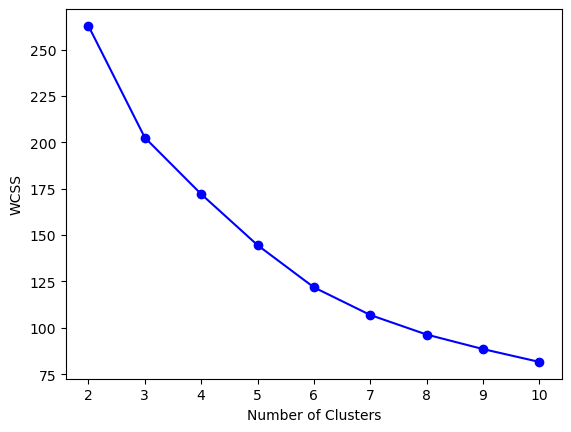

In [63]:
plt.plot(range(2,11),wcss,marker='o',linestyle='-',color='b')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [65]:
optimal_k = int(input("Enter the optimal number of clusters from the plot: "))

Enter the optimal number of clusters from the plot:  6


In [67]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [69]:
customer_data['Cluster'] = clusters

In [73]:
#DB INDEX
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.100974610830935


In [87]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3383023548451549


In [77]:
#To visualize the plotted cluster, PCA is used for dimensionality reduction
from sklearn.decomposition import PCA

In [79]:
#Visualizing clusters in 2D projections
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
customer_data['PCA1'] = reduced_features[:, 0]
customer_data['PCA2'] = reduced_features[:, 1]

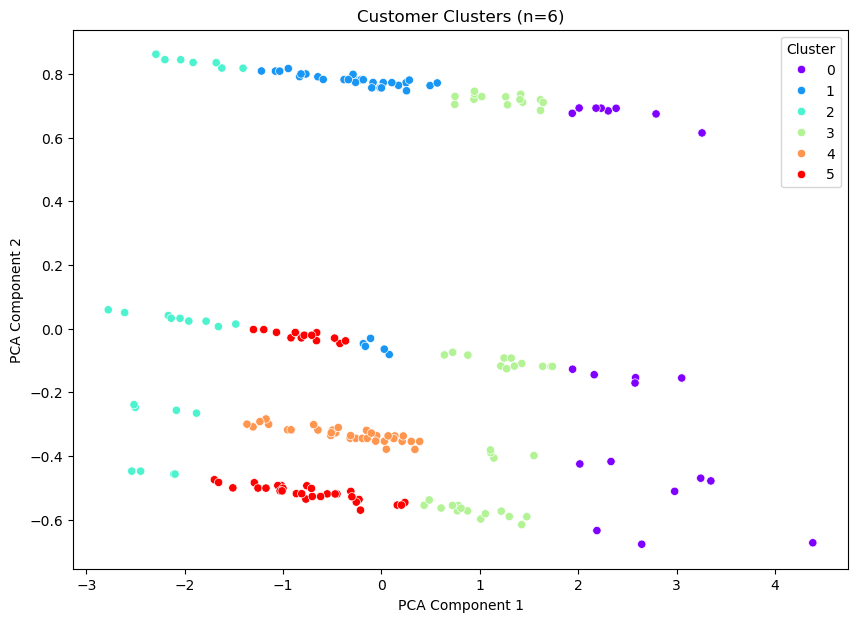

In [83]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='rainbow', legend="full")
plt.title(f"Customer Clusters (n={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()